source des données : https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy

Import des packages

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_row", 60)
pd.set_option("display.max_column", 60)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

Import des données

In [2]:
data = pd.read_csv('2016_Building_Energy_Benchmarking.csv')
data.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


# Analyse de forme

## Dimensions

In [3]:
df = data.copy()
df.shape

(3376, 46)

## Types de variables

In [4]:
df.dtypes.value_counts()

float64    22
object     15
int64       8
bool        1
dtype: int64

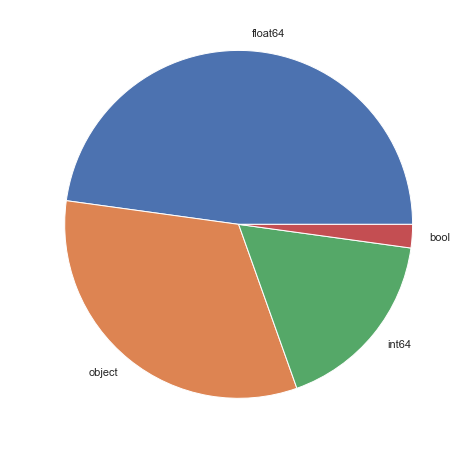

In [5]:
df.dtypes.value_counts().plot.pie(figsize=(8,8))
plt.ylabel(' ');

In [6]:
# nom des colonnes de type 'float'
for col in df.select_dtypes('float'):
    print(col)

ZipCode
Latitude
Longitude
NumberofBuildings
LargestPropertyUseTypeGFA
SecondLargestPropertyUseTypeGFA
ThirdLargestPropertyUseTypeGFA
ENERGYSTARScore
SiteEUI(kBtu/sf)
SiteEUIWN(kBtu/sf)
SourceEUI(kBtu/sf)
SourceEUIWN(kBtu/sf)
SiteEnergyUse(kBtu)
SiteEnergyUseWN(kBtu)
SteamUse(kBtu)
Electricity(kWh)
Electricity(kBtu)
NaturalGas(therms)
NaturalGas(kBtu)
Comments
TotalGHGEmissions
GHGEmissionsIntensity


In [7]:
# nom des colonnes de type 'int'
for col in df.select_dtypes('int'):
    print(col)

OSEBuildingID
DataYear
CouncilDistrictCode
YearBuilt
NumberofFloors
PropertyGFATotal
PropertyGFAParking
PropertyGFABuilding(s)


In [8]:
# On affiche les variables qualitatives et le nombre de catégories qu'elles contiennent
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique().size}')

BuildingType-------------------------------------- 8
PrimaryPropertyType------------------------------- 24
PropertyName-------------------------------------- 3362
Address------------------------------------------- 3354
City---------------------------------------------- 1
State--------------------------------------------- 1
TaxParcelIdentificationNumber--------------------- 3268
Neighborhood-------------------------------------- 19
ListOfAllPropertyUseTypes------------------------- 467
LargestPropertyUseType---------------------------- 57
SecondLargestPropertyUseType---------------------- 51
ThirdLargestPropertyUseType----------------------- 45
YearsENERGYSTARCertified-------------------------- 66
ComplianceStatus---------------------------------- 4
Outlier------------------------------------------- 3


In [9]:
# nom des colonnes de type 'bool'
for col in df.select_dtypes('bool'):
    print(col)

DefaultData


## Tableau des valeurs manquantes

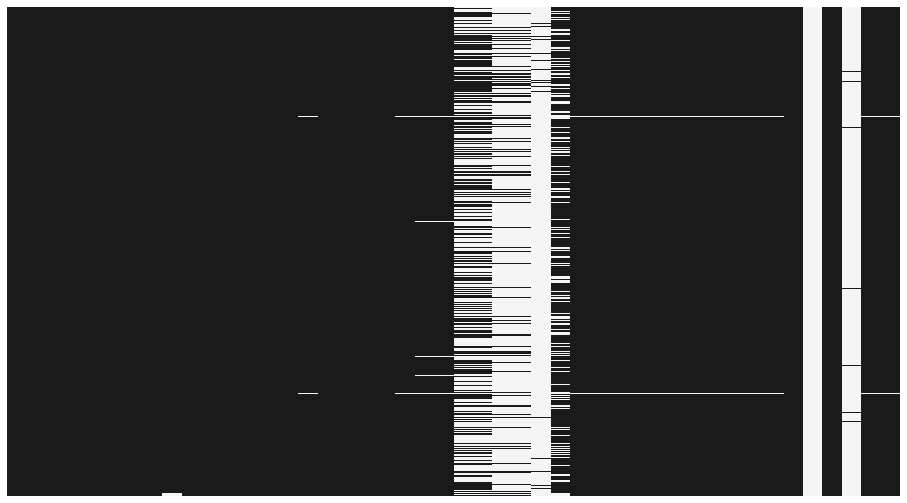

In [10]:
# Avec toutes les colonnes
plt.figure(figsize=(16,9))
plt.tick_params(labelbottom=False, labelleft=False)
sns.heatmap(df.isna(), cbar=False, cmap=['k', 'whitesmoke']);

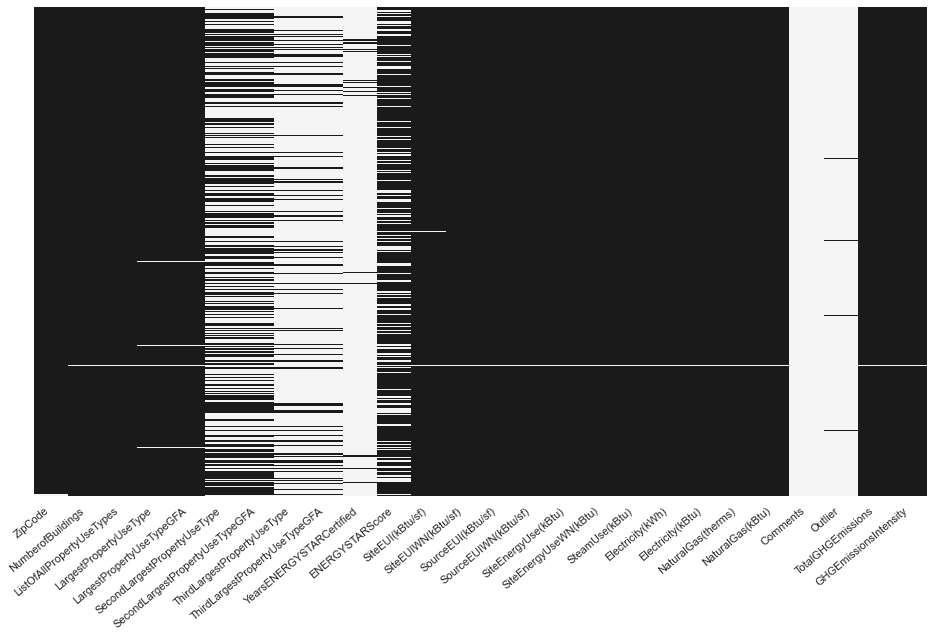

In [11]:
# Seulement avec les colonnes contenant des NaN
full_columns = df.dropna(axis=1).columns
plt.figure(figsize=(16,9))
plt.tick_params(labelbottom=True, labelleft=False)
sns.heatmap(df.drop(columns=full_columns).isna(), cbar=False, cmap=['k', 'whitesmoke'])
plt.xticks(rotation=40, horizontalalignment='right');

In [12]:
df.isna().mean().sort_values(ascending=False)

Comments                           1.000000
Outlier                            0.990521
YearsENERGYSTARCertified           0.964751
ThirdLargestPropertyUseType        0.823460
ThirdLargestPropertyUseTypeGFA     0.823460
SecondLargestPropertyUseType       0.502666
SecondLargestPropertyUseTypeGFA    0.502666
ENERGYSTARScore                    0.249704
LargestPropertyUseTypeGFA          0.005924
LargestPropertyUseType             0.005924
ZipCode                            0.004739
ListOfAllPropertyUseTypes          0.002666
SourceEUIWN(kBtu/sf)               0.002666
SourceEUI(kBtu/sf)                 0.002666
Electricity(kWh)                   0.002666
Electricity(kBtu)                  0.002666
NaturalGas(therms)                 0.002666
NaturalGas(kBtu)                   0.002666
TotalGHGEmissions                  0.002666
SteamUse(kBtu)                     0.002666
GHGEmissionsIntensity              0.002666
NumberofBuildings                  0.002370
SiteEUI(kBtu/sf)                

# Analyse de fond

## Visulation initiale - Elimination des colonnes inutiles

### Colonnes trop peu remplies

In [13]:
# On remplace les NaN dans les colonnes suivantes car on en aura besoin par la suite
df['SecondLargestPropertyUseTypeGFA'].fillna(0, inplace=True)
df['SecondLargestPropertyUseType'].fillna('None', inplace=True)
df['ThirdLargestPropertyUseTypeGFA'].fillna(0, inplace=True)
df['ThirdLargestPropertyUseType'].fillna('None', inplace=True)

In [14]:
# On retire les colonnes qui sont vides à plus de 90%
df = df[df.columns[df.isna().mean() < .9]]
df.shape

(3376, 43)

In [15]:
# Colonnes restantes qui contiennent des valeurs manquantes
df[df.columns[df.isna().mean() > 0]].isna().mean().sort_values(ascending=False)

ENERGYSTARScore              0.249704
LargestPropertyUseType       0.005924
LargestPropertyUseTypeGFA    0.005924
ZipCode                      0.004739
SteamUse(kBtu)               0.002666
TotalGHGEmissions            0.002666
NaturalGas(kBtu)             0.002666
NaturalGas(therms)           0.002666
Electricity(kBtu)            0.002666
Electricity(kWh)             0.002666
SourceEUIWN(kBtu/sf)         0.002666
SourceEUI(kBtu/sf)           0.002666
ListOfAllPropertyUseTypes    0.002666
GHGEmissionsIntensity        0.002666
NumberofBuildings            0.002370
SiteEUI(kBtu/sf)             0.002073
SiteEnergyUseWN(kBtu)        0.001777
SiteEUIWN(kBtu/sf)           0.001777
SiteEnergyUse(kBtu)          0.001481
dtype: float64

### Suppression des constantes

In [16]:
for col in df.columns:
    if df[col].unique().size == 1:
        print(col)

DataYear
City
State


In [17]:
print(df['DataYear'].unique())
print(df['City'].unique())
print(df['State'].unique())

[2016]
['Seattle']
['WA']


In [18]:
df = df.drop(columns=['DataYear', 'City', 'State'])
df.shape

(3376, 40)

### Catégories identiques

In [19]:
df['Neighborhood'].value_counts().sort_index()

BALLARD                   126
Ballard                     7
CENTRAL                   107
Central                    27
DELRIDGE                   80
DELRIDGE NEIGHBORHOODS      1
DOWNTOWN                  573
Delridge                    4
EAST                      453
GREATER DUWAMISH          375
LAKE UNION                251
MAGNOLIA / QUEEN ANNE     423
NORTH                     145
NORTHEAST                 280
NORTHWEST                 210
North                      42
Northwest                  11
SOUTHEAST                  95
SOUTHWEST                 166
Name: Neighborhood, dtype: int64

In [20]:
# On fusionne les valeurs de 'Neighborhood' écrites en miniscules avec les mêmes écrites en majuscules
df['Neighborhood'] = df['Neighborhood'].str.upper()

# On fusionne les valeurs `DELRIDGE NEIGHBORHOODS` et `DELRIDGE`
df.loc[df['Neighborhood'] == 'DELRIDGE NEIGHBORHOODS', 'Neighborhood'] = 'DELRIDGE'
df["Neighborhood"].value_counts().sort_values(ascending=False)

DOWNTOWN                 573
EAST                     453
MAGNOLIA / QUEEN ANNE    423
GREATER DUWAMISH         375
NORTHEAST                280
LAKE UNION               251
NORTHWEST                221
NORTH                    187
SOUTHWEST                166
CENTRAL                  134
BALLARD                  133
SOUTHEAST                 95
DELRIDGE                  85
Name: Neighborhood, dtype: int64

### Variables similaires

In [21]:
# On retire les sources d'énergies qui ne sont pas exprimées en kBtu
df = df.drop(columns=['Electricity(kWh)', 'NaturalGas(therms)'])
df.shape

(3376, 38)

### Variables non normalisées WN

In [22]:
# On retire les variables de consommation qui ne sont pas 'Weather-Normalized'
df = df.drop(columns=['SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)'])
df.shape

(3376, 35)

### Bâtiments destinés à l'habitation

On va retirer ici les bâtiments destinés à l'habitation

In [23]:
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [24]:
mask = ((df['BuildingType'] == 'Multifamily MR (5-9)')
       | (df['BuildingType'] == 'Multifamily LR (1-4)')
       | (df['BuildingType'] == 'Multifamily HR (10+)'))
df = df[~mask]
df.shape

(1668, 35)

In [25]:
df['PrimaryPropertyType'].unique()

array(['Hotel', 'Other', 'Mixed Use Property', 'K-12 School',
       'University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility', 'Warehouse', 'Large Office',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital', 'Residence Hall', 'Distribution Center',
       'Worship Facility', 'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'Restaurant', 'Low-Rise Multifamily',
       'Office'], dtype=object)

In [26]:
df = df[~(df['PrimaryPropertyType'] == 'Residence Hall')]
df = df[~(df['PrimaryPropertyType'] == 'Low-Rise Multifamily')]
df.shape

(1644, 35)

In [27]:
df = df[~(df['LargestPropertyUseType'] == 'Multifamily Housing')]
df = df[~(df['LargestPropertyUseType'] == 'Residence Hall/Dormitory')]

df = df[~(df['SecondLargestPropertyUseType'] == 'Multifamily Housing')]
df = df[~(df['SecondLargestPropertyUseType'] == 'Residence Hall/Dormitory')]

df = df[~(df['ThirdLargestPropertyUseType'] == 'Multifamily Housing')]

df.shape

(1610, 35)

### Valeurs aberrantes

On ne garde que les bâtiments pour lesquels la consommation et les émissions de gaz à effet de serre sont supérieurs à 0

In [28]:
df = df[df['SiteEUIWN(kBtu/sf)'] > 0]
df.shape

(1582, 35)

In [29]:
df = df[df['GHGEmissionsIntensity'] > 0]
df.shape

(1578, 35)

In [30]:
# On remplace les valeurs de 'NumberofBuildings' qui valent 0 par 1
df.loc[df['NumberofBuildings'] == 0, 'NumberofBuildings'] = 1

### Traitement des valeurs manquantes

In [31]:
# remplissage des NaN dans 'LargestPropertyUseType' par la valeur de 'PrimaryPropertyType'
mask = df['LargestPropertyUseType'].isna()
df.loc[mask, 'LargestPropertyUseType'] = df.loc[mask, 'PrimaryPropertyType']

# On retire le 'Other' présent dans certaines valeurs des colonnes de type 'LargestPropertyUseType'.
for col in ['LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']:
    # Valeurs commençant par 'Other -'
    mask = df[col].str.contains('Other -')
    df.loc[mask, col] = df.loc[mask, col].transform(lambda x: x.split(' - ')[1])
    # Autres valeurs contenant le mot 'Other'
    df.loc[df[col] == 'Other/Specialty Hospital', col] = 'Specialty Hospital'
    df.loc[df[col] == 'Urgent Care/Clinic/Other Outpatient', col] = 'Urgent Care/Clinic/Outpatient'
    # On affiche la catégorie qui contient encore le mot 'Other': il s'agit de la catégorie en question
    print(df.loc[df[col].str.contains('Other'), col].unique())

['Other']
['Other']
['Other']


On remplace les NaN dans `LargestPropertyUseTypeGFA` par la valeur de `PropertyGFATotal` correspondante

In [32]:
mask = df['LargestPropertyUseTypeGFA'].isna()
df.loc[mask, 'LargestPropertyUseTypeGFA'] = df.loc[mask, 'PropertyGFATotal']

On enlève les bâtiments pour lesquels il n'y a pas de relevé de consommation

In [33]:
df = df[df['SiteEnergyUseWN(kBtu)'].notna()]
df.shape

(1578, 35)

### Variables avec des valeurs trop peu fréquentes

On va supprimer la variable `ZipCode` car elle contient de nombreuses valeurs qui n'apparaissent qu'une ou deux fois dans le data set

In [34]:
df['ZipCode'].value_counts(ascending=True)

98145.0      1
98177.0      1
98113.0      1
98191.0      1
98185.0      1
98165.0      1
98114.0      1
98070.0      1
98020.0      1
98033.0      1
98053.0      1
98181.0      1
98006.0      1
98164.0      1
98111.0      2
98195.0      2
98124.0      2
98013.0      2
98146.0      2
98154.0      2
98168.0      2
98178.0      3
98155.0      4
98136.0      6
98117.0     18
98112.0     20
98199.0     21
98126.0     22
98116.0     24
98102.0     25
98106.0     25
98144.0     46
98118.0     46
98107.0     47
98115.0     48
98133.0     50
98125.0     51
98119.0     59
98103.0     62
98105.0     73
98121.0     76
98122.0     86
98108.0    120
98109.0    136
98101.0    141
98104.0    147
98134.0    178
Name: ZipCode, dtype: int64

In [35]:
df = df.drop(columns='ZipCode')
df.shape

(1578, 34)

### Colonnes inutiles

On va supprimer ici les colonnes qui ne semblent pas importantes pour la suite

In [36]:
df.columns

Index(['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType', 'PropertyName',
       'Address', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode',
       'Neighborhood', 'Latitude', 'Longitude', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore',
       'SiteEUIWN(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)',
       'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)',
       'DefaultData', 'ComplianceStatus', 'TotalGHGEmissions',
       'GHGEmissionsIntensity'],
      dtype='object')

In [37]:
drop_columns = ['OSEBuildingID', 'PropertyName', 
                'Address', 'TaxParcelIdentificationNumber',
                'Latitude', 'Longitude',
                'PropertyGFAParking', 'ListOfAllPropertyUseTypes',
                'DefaultData', 'ComplianceStatus']
df = df.drop(columns=drop_columns)
df.shape

(1578, 24)

In [38]:
df.columns

Index(['BuildingType', 'PrimaryPropertyType', 'CouncilDistrictCode',
       'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFABuilding(s)', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore',
       'SiteEUIWN(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)',
       'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)',
       'TotalGHGEmissions', 'GHGEmissionsIntensity'],
      dtype='object')

La seule colonne contenant encore des valeurs manquantes est la colonne `ENERGYSTARScore`

In [39]:
df.isna().mean().sort_values()[df.isna().mean()>0]

ENERGYSTARScore    0.332066
dtype: float64

## Visualisation des targets

### Targets non normalisées

Les variables que nous allons tenter de modéliser sont les variables qui correspondent à la consommation totale d'énergie et à l'émission des gaz à effet de serre. Pour la consommation d'énergie, on va prendre la variable `SiteEnergyUseWN(kBtu)` qui est 'Weather-normalized', c'est-à-dire que les variations climatiques pouvant survenir d'une année à l'autre sont pris en compte. Pour l'émission des gaz à effet de serre, on va prendre la variable `TotalGHGEmissions`

In [40]:
targets = ['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions']

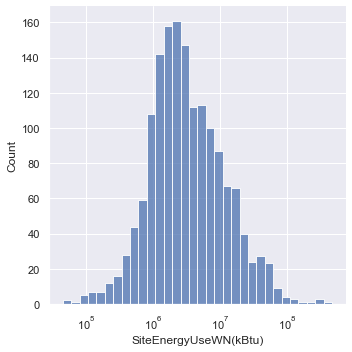

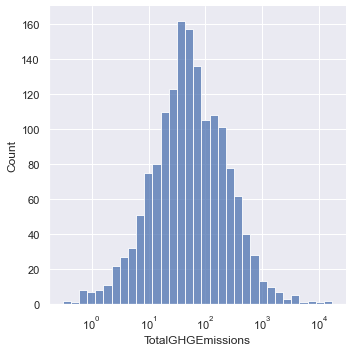

In [41]:
for target in targets:
    sns.displot(x=target, data=df[df[target] > 0], log_scale=True)

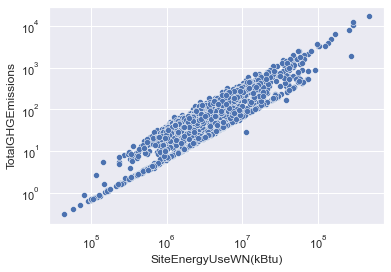

In [42]:
# Relation entre les targets
ax = sns.scatterplot(x=targets[0], y=targets[1], data=df)
ax.set_xscale('log')
ax.set_yscale('log')

### Targets normalisées

Pour l'analyse exploratoire nous allons utiliser les intensités des targets précédentes, c'est-à-dire les valeurs exprimées par unité de surface, car elles ne dépendent pas de la taille du bâtiment. Ensuite, pour la modélisation, nous utiliserons les targets non normalisées car ce sont ces données que nous voulons prédire

In [43]:
targets_norm = ['SiteEUIWN(kBtu/sf)', 'GHGEmissionsIntensity']

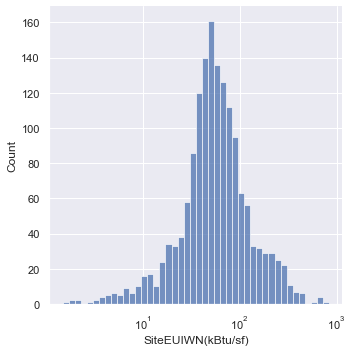

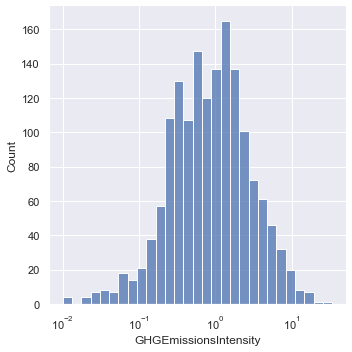

In [44]:
for target_norm in targets_norm:
    sns.displot(x=target_norm, data=df[df[target_norm] > 0], log_scale=True)

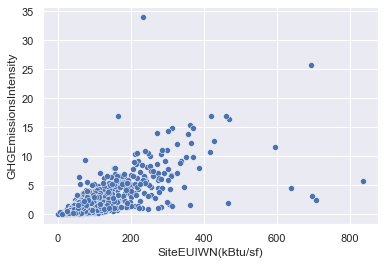

In [45]:
# Relation entre les targets normalisées
sns.scatterplot(x=targets_norm[0], y=targets_norm[1], data=df);

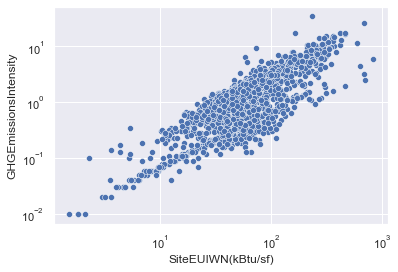

In [46]:
# Relation entre les targets
ax = sns.scatterplot(x=targets_norm[0], y=targets_norm[1], data=df)
ax.set_xscale('log')
ax.set_yscale('log')

## Variables quantitatives

### Changement de type

La variable `NumberofBuildings` est une variable à valeurs entières

In [47]:
df['NumberofBuildings'] = df['NumberofBuildings'].astype('int')

### Distribution des valeurs continues

In [48]:
# Liste des variables de type 'float'
list(df.select_dtypes('float'))

['LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kBtu)',
 'NaturalGas(kBtu)',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity']

In [49]:
df.select_dtypes('float').describe().T

,count,mean,std,min,25%,50%,75%,max
LargestPropertyUseTypeGFA,1578.0,9.340908e+04,1.603784e+05,5656.00,2.559000e+04,4.377050e+04,9.161675e+04,1.719643e+06
SecondLargestPropertyUseTypeGFA,1578.0,1.821110e+04,5.042184e+04,0.00,0.000000e+00,0.000000e+00,1.237250e+04,6.399310e+05
ThirdLargestPropertyUseTypeGFA,1578.0,2.786561e+03,1.731537e+04,0.00,0.000000e+00,0.000000e+00,0.000000e+00,4.597480e+05
ENERGYSTARScore,1054.0,6.536717e+01,2.857344e+01,1.00,4.800000e+01,7.300000e+01,8.900000e+01,1.000000e+02
SiteEUIWN(kBtu/sf),1578.0,7.633910e+01,7.604075e+01,1.50,3.680000e+01,5.435000e+01,8.657500e+01,8.344000e+02
SourceEUIWN(kBtu/sf),1578.0,1.829218e+02,1.887493e+02,4.60,8.182500e+01,1.358500e+02,2.087750e+02,2.620000e+03
SiteEnergyUseWN(kBtu),1578.0,8.296858e+06,2.256253e+07,44293.50,1.331126e+06,2.749243e+06,7.322608e+06,4.716139e+08
SteamUse(kBtu),1578.0,4.754072e+05,5.242380e+06,0.00,0.000000e+00,0.000000e+00,0.000000e+00,1.349435e+08
Electricity(kBtu),1578.0,5.549234e+06,1.361064e+07,0.00,7.254918e+05,1.621417e+06,4.951488e+06,2.745325e+08
NaturalGas(kBtu),1578.0,2.021647e+06,9.616975e+06,0.00,0.000000e+00,5.040515e+05,1.531840e+06,2.979090e+08


In [76]:
df_ = df.select_dtypes('float')
df_.shape

(1578, 12)

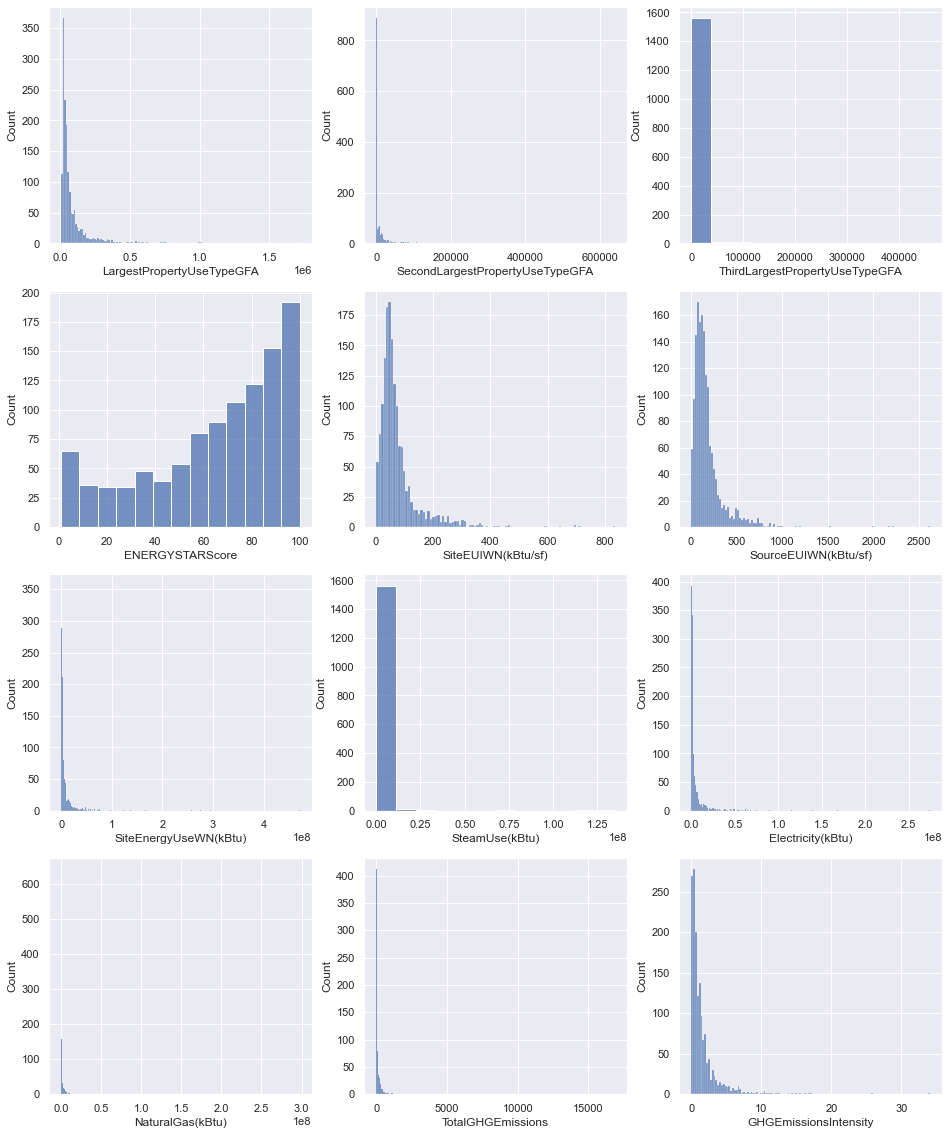

In [91]:
nrows_plot = df_.shape[1]//3 if df_.shape[1]%3==0 else df_.shape[1]//3 + 1
fig, axs = plt.subplots(nrows_plot, 3, figsize=(16,5*nrows_plot))
for i in range(nrows_plot):
    for j in range(3):
        if j+(3*i) == df_.shape[1] : break
        else : sns.histplot(x=df_.iloc[:, j+(3*i)], kde=False, ax=axs[i,j])

Autre alternative dans laquelle on affiche les graphes 3 par 3 :
```Python
for i in range(df_.shape[1]//3 + 1):
    fig, axs = plt.subplots(1, 3, figsize=(16,4))
    for j in range(3):
        if j+(3*i) == df_.shape[1] : break
        else : sns.histplot(x=df_.iloc[:, j+(3*i)], kde=False, ax=axs[j])
```

Cette fois, on va tracer les distributions en échelle semi-logarithmique

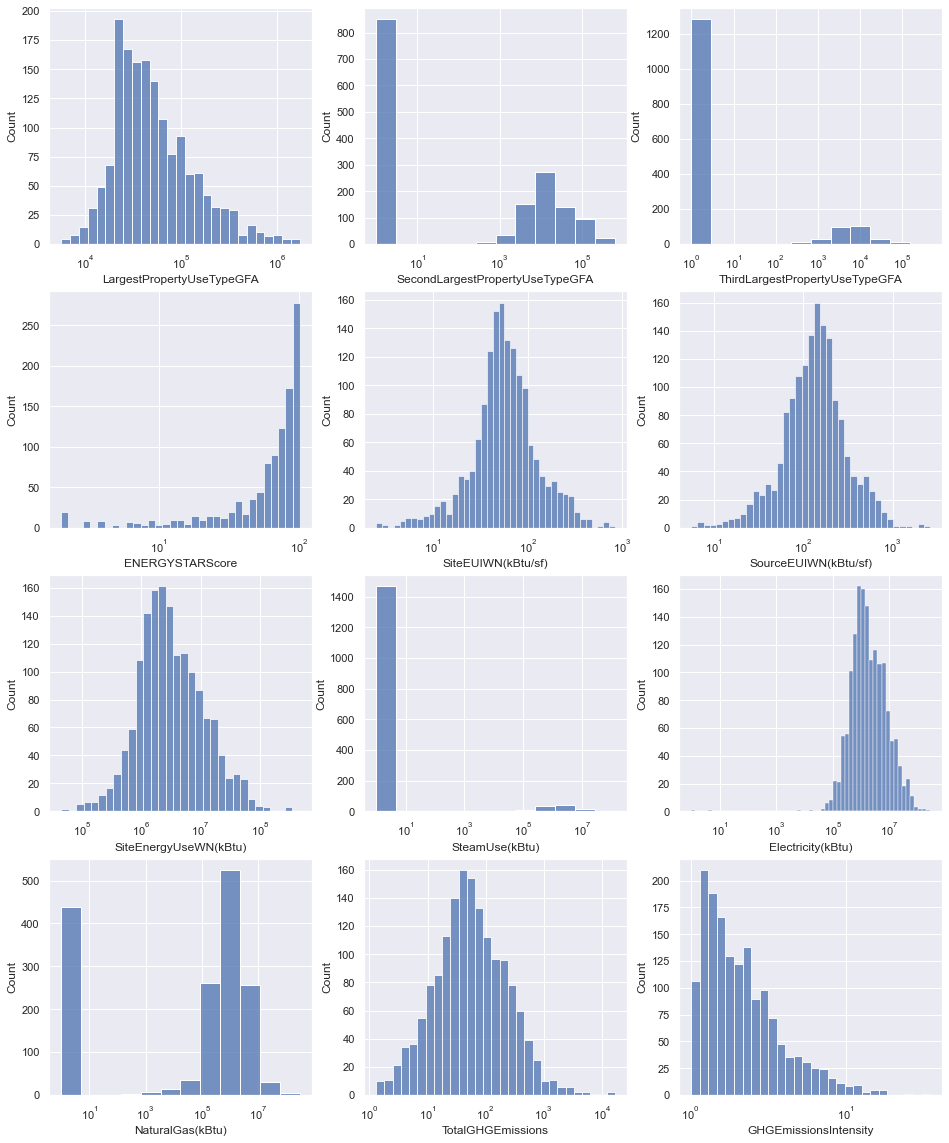

In [90]:
nrows_plot = df_.shape[1]//3 if df_.shape[1]%3==0 else df_.shape[1]//3 + 1
fig, axs = plt.subplots(nrows_plot, 3, figsize=(16,5*nrows_plot))
for i in range(nrows_plot):
    for j in range(3):
        if j+(3*i) == df_.shape[1] : break
        else : sns.histplot(x=df_.iloc[:, j+(3*i)]+1, # +1 pour ne pas avoir log(0)
                            kde=False,
                            ax=axs[i,j],
                            log_scale=True)

On peut voir que la majorité des variables flottantes ont une distribution normale une fois passée en échelle logarithmique

### Distribution des valeurs discrètes

In [92]:
# Liste des variables de type 'int'
list(df.select_dtypes('int'))

['CouncilDistrictCode',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFABuilding(s)']

La variable `CouncilDistrictCode` est en fait une variable catégorielle

In [100]:
df.select_dtypes('int').describe().T

,count,mean,std,min,25%,50%,75%,max
CouncilDistrictCode,1578.0,4.328264,2.205079,1.0,2.0,4.0,7.0,7.0
YearBuilt,1578.0,1961.956907,32.349873,1900.0,1930.0,1965.0,1989.0,2015.0
NumberofBuildings,1578.0,1.137516,1.168482,1.0,1.0,1.0,1.0,27.0
NumberofFloors,1578.0,4.093790,6.622061,0.0,1.0,2.0,4.0,99.0
PropertyGFATotal,1578.0,112363.067174,191904.363500,11285.0,29383.0,48819.5,103424.5,2200000.0
PropertyGFABuilding(s),1578.0,99463.043726,170500.492345,3636.0,28304.0,46721.0,93981.5,2200000.0


In [101]:
df_ = df.select_dtypes('int')
df_.shape

(1578, 6)

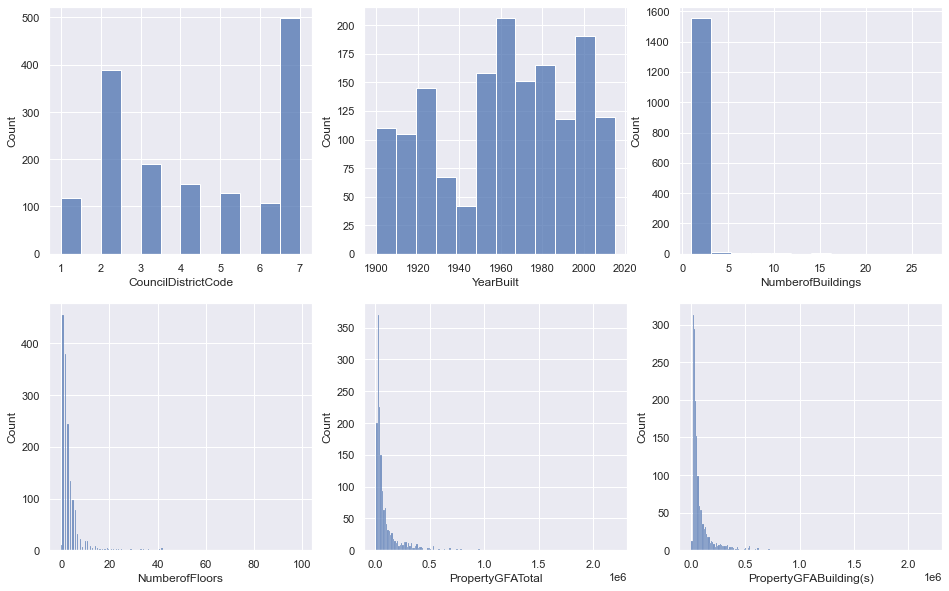

In [103]:
nrows_plot = df_.shape[1]//3 if df_.shape[1]%3==0 else df_.shape[1]//3 + 1
fig, axs = plt.subplots(nrows_plot, 3, figsize=(16,5*nrows_plot))
for i in range(nrows_plot):
    for j in range(3):
        if j+(3*i) == df_.shape[1] : break
        else : sns.histplot(x=df_.iloc[:, j+(3*i)], kde=False,ax=axs[i,j])

Les distributions des variables `NumberofBuildings`, `NumberofFloors`, `PropertyGFATotal`, et `PropertyGFABuilding(s)` sont très asymétriques. 

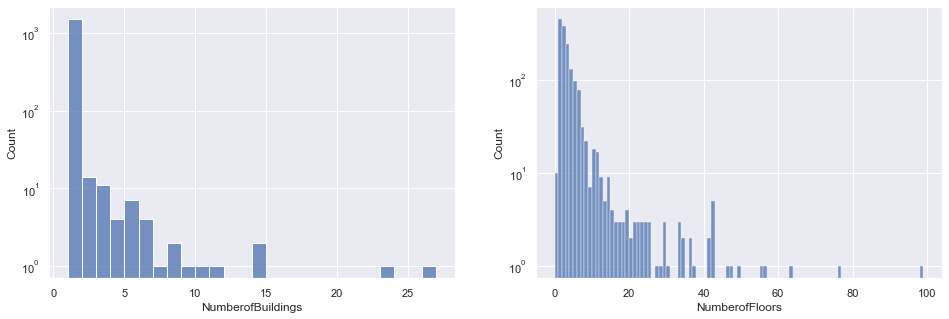

In [123]:
fig, axs = plt.subplots(1, 2, figsize=(16,5))
i = 0
for col in ['NumberofBuildings', 'NumberofFloors']:
    sns.histplot(x=df_[col], binwidth=1, log_scale=(False, True), ax=axs[i]);
    i += 1

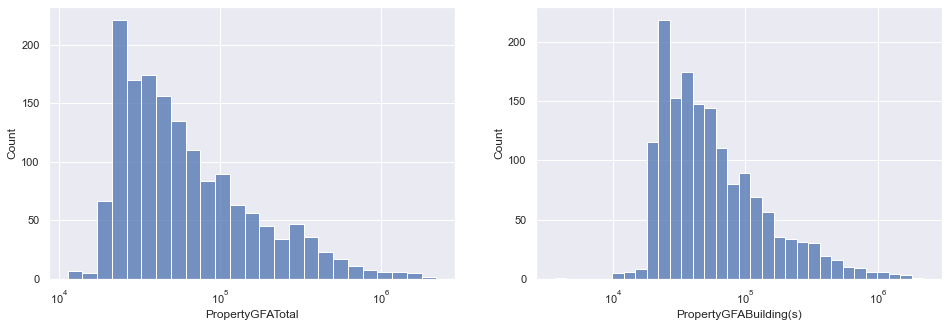

In [124]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))
i = 0
for col in ['PropertyGFATotal', 'PropertyGFABuilding(s)']:
    sns.histplot(x=df_[col]+1, log_scale=True, ax=axs[i])
    i += 1

### Boxplots

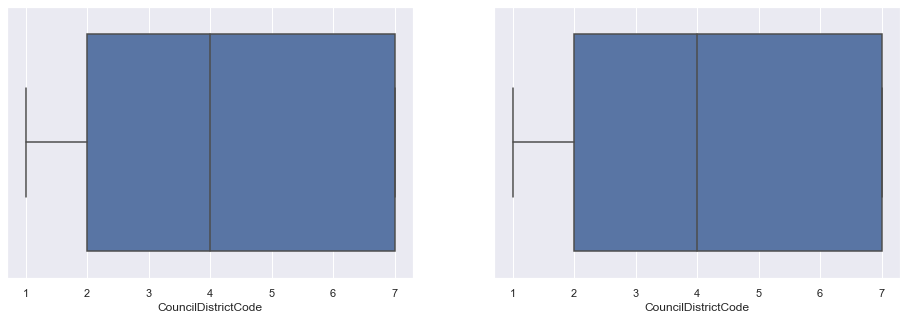

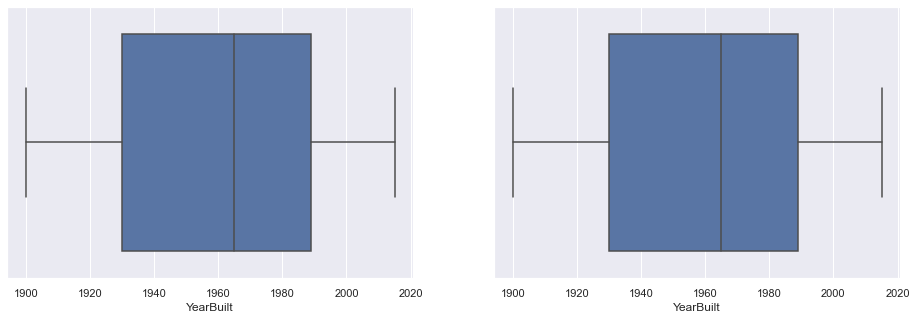

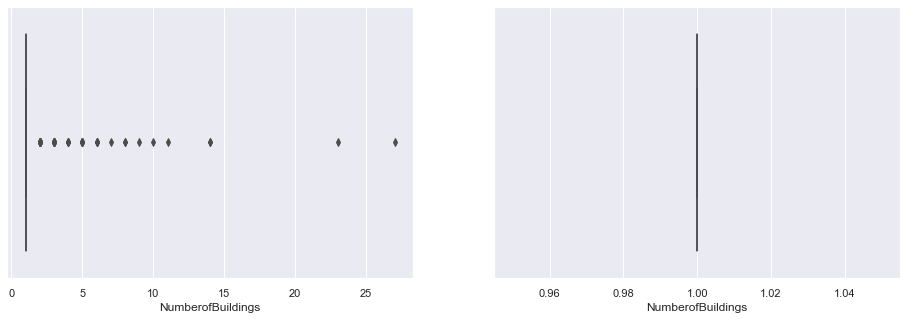

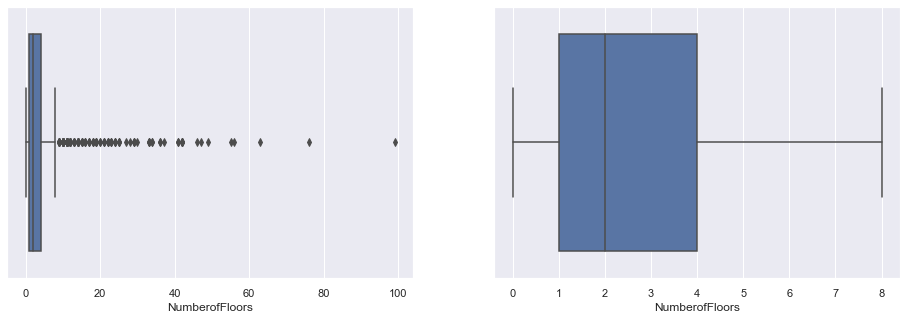

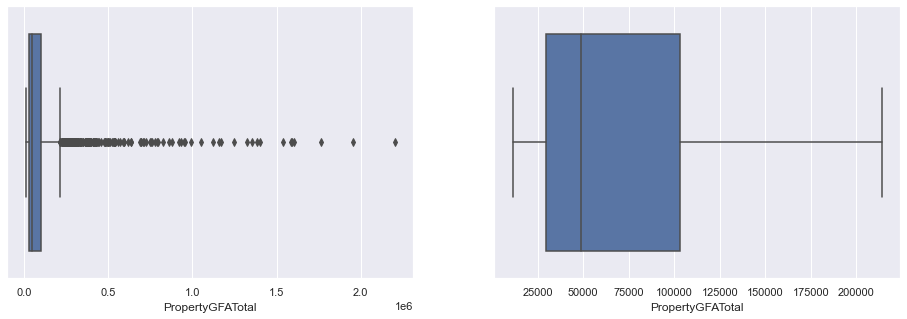

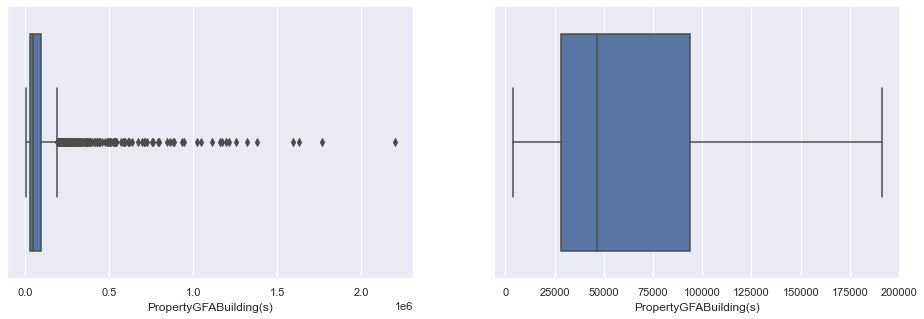

In [125]:
for col in df.select_dtypes('int').columns:
    fig, axs = plt.subplots(1, 2, figsize=(16,5))
    sns.boxplot(x=df[col], ax=axs[0])
    sns.boxplot(x=df[col], showfliers=False, ax=axs[1]);

## Variables qualitatives

In [126]:
# On affiche les variables qualitatives et le nombre de catégories qu'elles contiennent
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique().size}')

BuildingType-------------------------------------- 5
PrimaryPropertyType------------------------------- 20
Neighborhood-------------------------------------- 13
LargestPropertyUseType---------------------------- 54
SecondLargestPropertyUseType---------------------- 46
ThirdLargestPropertyUseType----------------------- 38


### Répartition des valeurs

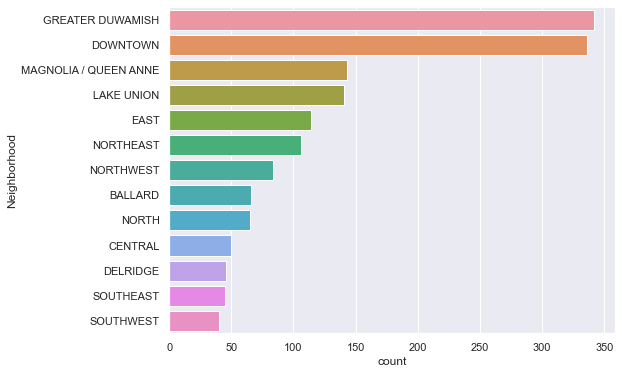

In [128]:
order = df['Neighborhood'].value_counts().index
plt.figure(figsize=(8,6))
sns.countplot(y='Neighborhood', data=df, order=order);

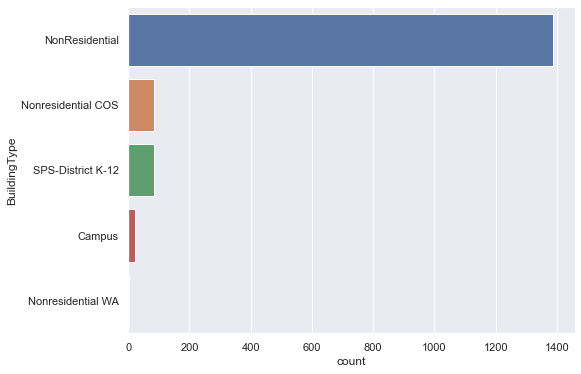

In [129]:
order = df['BuildingType'].value_counts().index
plt.figure(figsize=(8,6))
sns.countplot(y='BuildingType', data=df, order=order);

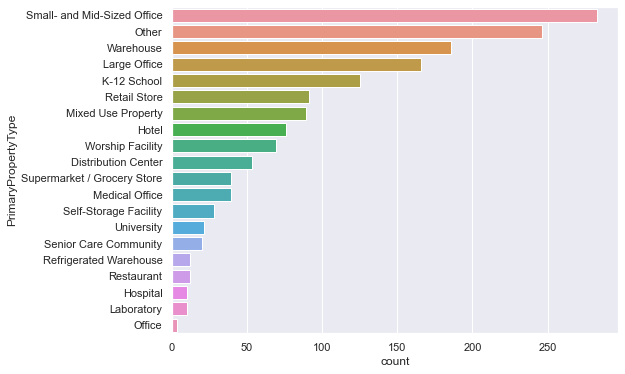

In [130]:
order = df['PrimaryPropertyType'].value_counts().index
plt.figure(figsize=(8,6))
sns.countplot(y='PrimaryPropertyType', data=df, order=order);

La catégorie `Office` peut être fusionnée avec l'une des catégories `Large Office` ou `Small- and Mid-Sized Office` (qui elle-même pourrait être divisée en _Small-Sized_ et _Mid-Sized_)

In [149]:
mask = df['PrimaryPropertyType'] == 'Office'
df.loc[mask, 'PropertyGFATotal'].describe()

count        3.000000
mean     13784.333333
std       1555.671023
min      12294.000000
25%      12977.500000
50%      13661.000000
75%      14529.500000
max      15398.000000
Name: PropertyGFATotal, dtype: float64

La surface totale des bâtiments de la catégorie `Office` sont compris entre 12 000 et 15 000, ils peuvent donc être classés dans la catégorie `Small- and Mid-Sized Office`

In [152]:
mask1 = df['PrimaryPropertyType'] == 'Small- and Mid-Sized Office'
mask2 = df['PrimaryPropertyType'] == 'Large Office'
mask3 = df['PrimaryPropertyType'] == 'Office'
df_ = df[mask1 | mask2 | mask3]
df_['PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    283
Large Office                   166
Office                           3
Name: PrimaryPropertyType, dtype: int64

In [153]:
df.loc[mask, 'PrimaryPropertyType'] = 'Small- and Mid-Sized Office'

In [155]:
df_ = df[mask1 | mask2 | mask3]
df_['PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    286
Large Office                   166
Name: PrimaryPropertyType, dtype: int64

On voit cependant que les deux catégories de _Office_ se chevauchent en terme de surface, il faudrait fixer une valeur qui sépare les deux

(0.0, 300000.0)

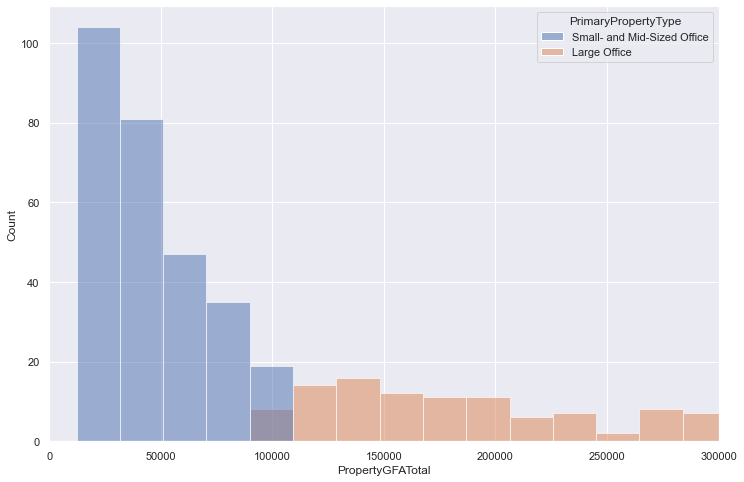

In [157]:
fig, ax = plt.subplots(figsize=(12,8))
sns.histplot(data=df_, x='PropertyGFATotal', bins=100, hue='PrimaryPropertyType', ax=ax)
ax.set_xlim(0, 3e5)

In [58]:
df["LargestPropertyUseType"].value_counts().sort_values(ascending=False)

Office                                                  476
Non-Refrigerated Warehouse                              197
K-12 School                                             125
Other                                                    97
Retail Store                                             96
Hotel                                                    76
Worship Facility                                         69
Distribution Center                                      54
Medical Office                                           41
Supermarket/Grocery Store                                40
Recreation                                               31
Self-Storage Facility                                    28
Parking                                                  28
College/University                                       21
Entertainment/Public Assembly                            20
Senior Care Community                                    20
Laboratory                              

In [59]:
df["SecondLargestPropertyUseType"].value_counts().sort_values(ascending=False)

None                                                    772
Parking                                                 320
Office                                                  161
Retail Store                                             81
Other                                                    44
Restaurant                                               29
Non-Refrigerated Warehouse                               29
Fitness Center/Health Club/Gym                           16
Data Center                                              13
Services                                                 11
Medical Office                                            8
Laboratory                                                8
Bank Branch                                               7
Distribution Center                                       7
Supermarket/Grocery Store                                 6
Entertainment/Public Assembly                             6
K-12 School                             

In [60]:
df["ThirdLargestPropertyUseType"].value_counts().sort_values(ascending=False)

None                                                    1261
Office                                                    48
Retail Store                                              44
Parking                                                   39
Other                                                     38
Restaurant                                                27
Non-Refrigerated Warehouse                                15
Data Center                                               14
Swimming Pool                                             10
Medical Office                                             9
Food Service                                               8
Pre-school/Daycare                                         8
Social/Meeting Hall                                        6
Restaurant/Bar                                             5
Bank Branch                                                4
Entertainment/Public Assembly                              4
Fitness Center/Health Cl

In [61]:
largest = df['LargestPropertyUseType'].unique()
second = df['SecondLargestPropertyUseType'].unique()
# Catégories qui sont dans 'SecondLargestPropertyUseType' mais pas dans 'LargestPropertyUseType'
second[~np.isin(second, largest)]

array(['None', 'Vocational School', 'Swimming Pool',
       'Convenience Store without Gas Station', 'Enclosed Mall',
       'Bar/Nightclub', 'Food Sales'], dtype=object)

In [62]:
third = df['ThirdLargestPropertyUseType'].unique()
# Catégories qui sont dans 'ThirdLargestPropertyUseType' mais pas dans 'SecondLargestPropertyUseType'
third[~np.isin(third, second)]

array(['Utility', 'Technology/Science', 'Specialty Hospital',
       'Fast Food Restaurant', 'Strip Mall'], dtype=object)

# Relation Target / Variables

## Relation Target / Floating variables

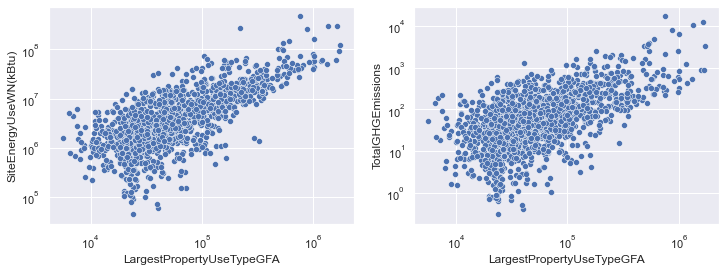

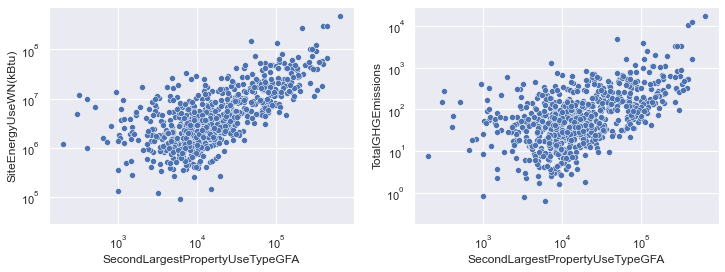

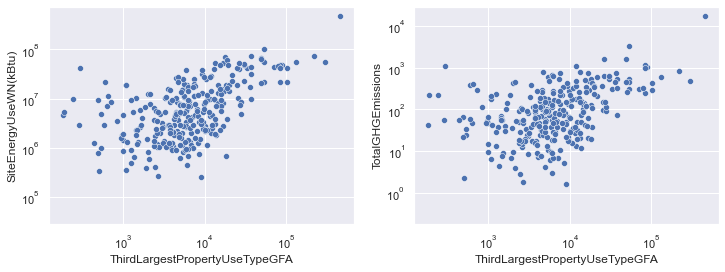

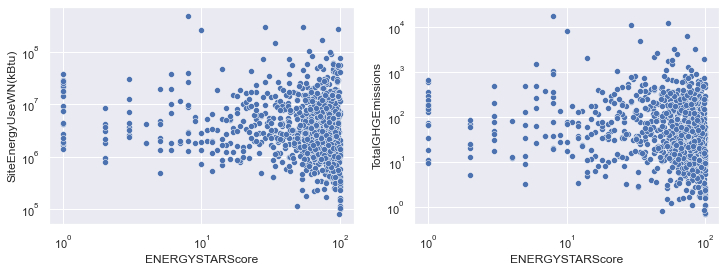

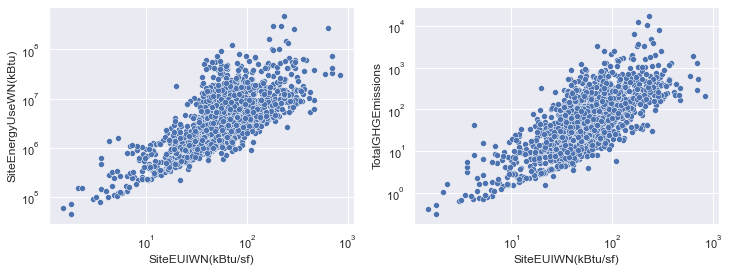

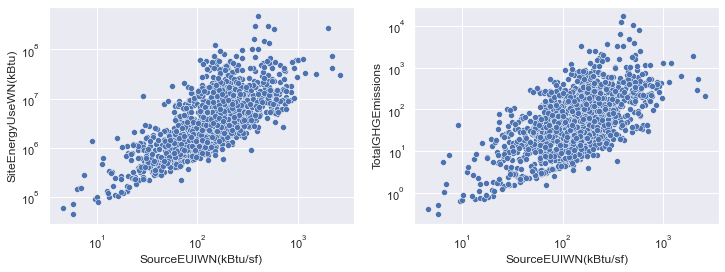

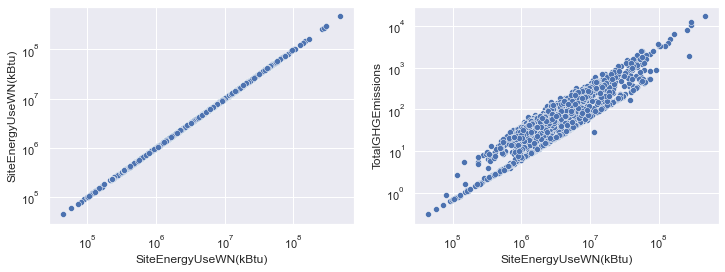

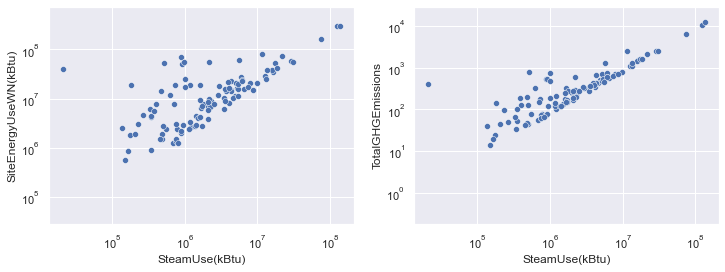

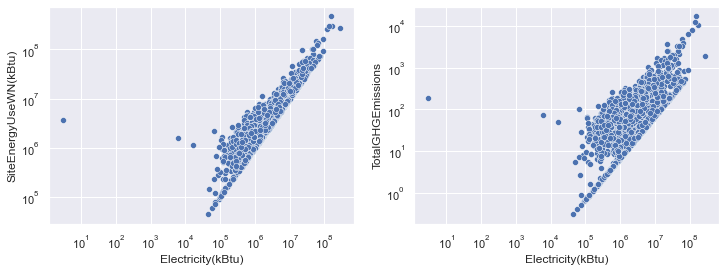

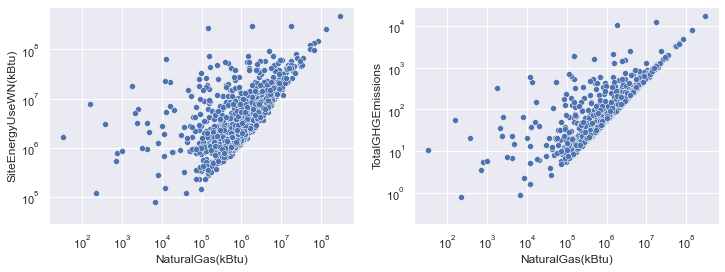

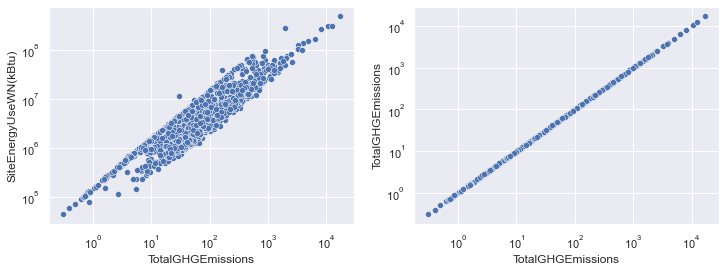

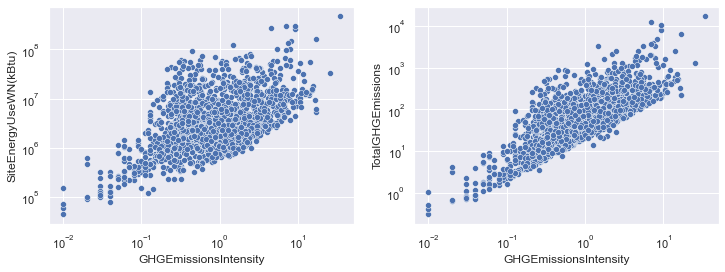

In [63]:
for col in df.select_dtypes('float'):
    fig, axs = plt.subplots(1, 2, figsize=(12,4))
    sns.scatterplot(x=col, y=targets[0], data=df, ax=axs[0])
    sns.scatterplot(x=col, y=targets[1], data=df, ax=axs[1])
    axs[0].set_xscale('log')
    axs[0].set_yscale('log')
    axs[1].set_xscale('log')
    axs[1].set_yscale('log')

## Relation Target / variables discrètes

### District Code

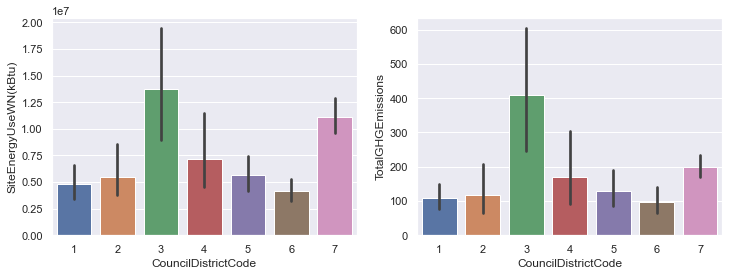

In [64]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))
sns.barplot(x='CouncilDistrictCode', y=targets[0], data=df, ax=axs[0])
sns.barplot(x='CouncilDistrictCode', y=targets[1], data=df, ax=axs[1]);

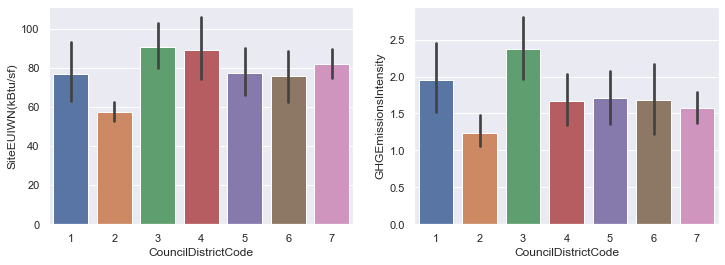

In [65]:
# Avec les targets normalisées
fig, axs = plt.subplots(1, 2, figsize=(12,4))
sns.barplot(x='CouncilDistrictCode', y=targets_norm[0], data=df, ax=axs[0])
sns.barplot(x='CouncilDistrictCode', y=targets_norm[1], data=df, ax=axs[1]);

### Year Built

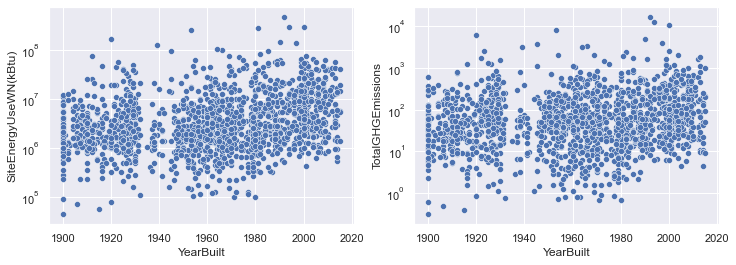

In [66]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))
sns.scatterplot(x='YearBuilt', y=targets[0], data=df, ax=axs[0])
sns.scatterplot(x='YearBuilt', y=targets[1], data=df, ax=axs[1])
axs[0].set_yscale('log')
axs[1].set_yscale('log');

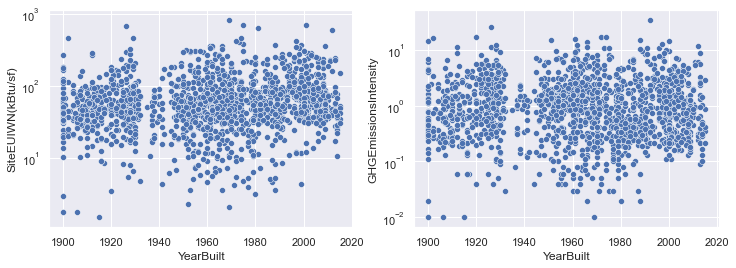

In [67]:
# Avec les targets normalisées
fig, axs = plt.subplots(1, 2, figsize=(12,4))
sns.scatterplot(x='YearBuilt', y=targets_norm[0], data=df, ax=axs[0])
sns.scatterplot(x='YearBuilt', y=targets_norm[1], data=df, ax=axs[1])
axs[0].set_yscale('log')
axs[1].set_yscale('log');

L'âge du bâtiment ne semble pas avoir d'influence sur sa consommation ou ses émissions de CO$_2$

### Number of floors

In [68]:
df['NumberofFloors'].unique().size

44

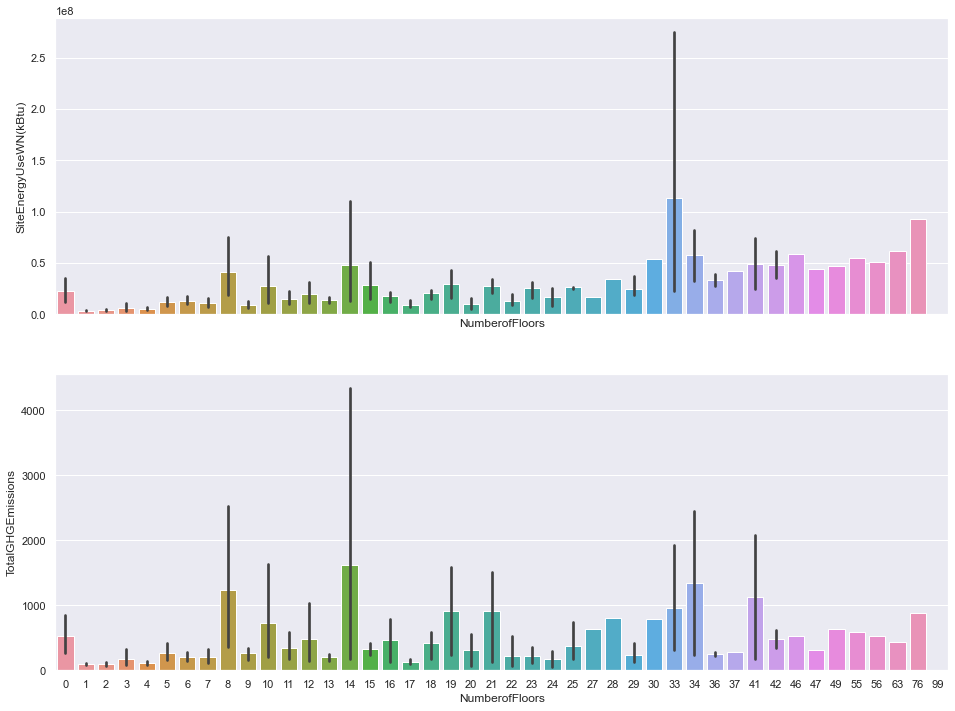

In [69]:
fig, axs = plt.subplots(2, 1, figsize=(16,12), sharex=True)
sns.barplot(x='NumberofFloors', y=targets[0], data=df, ax=axs[0])
sns.barplot(x='NumberofFloors', y=targets[1], data=df, ax=axs[1]);

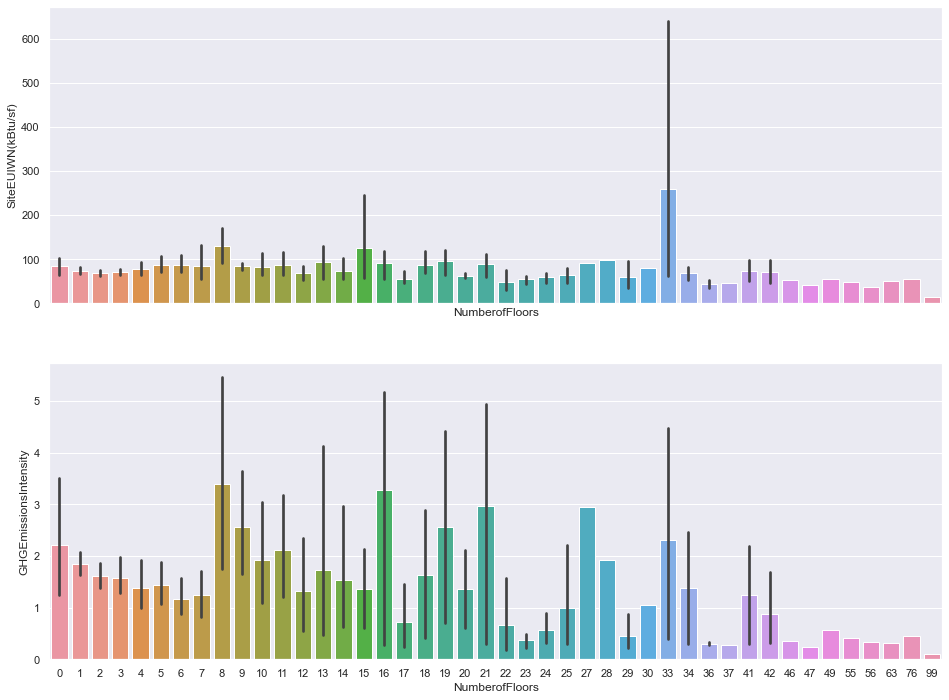

In [70]:
fig, axs = plt.subplots(2, 1, figsize=(16,12), sharex=True)
sns.barplot(x='NumberofFloors', y=targets_norm[0], data=df, ax=axs[0])
sns.barplot(x='NumberofFloors', y=targets_norm[1], data=df, ax=axs[1]);

Plus la bâtiment est grand plus sa consommation totale sera élevée. En dehors de ça, difficile de deviner une tendance

## Relation Target / Variables catégorielles

### Neighborhood

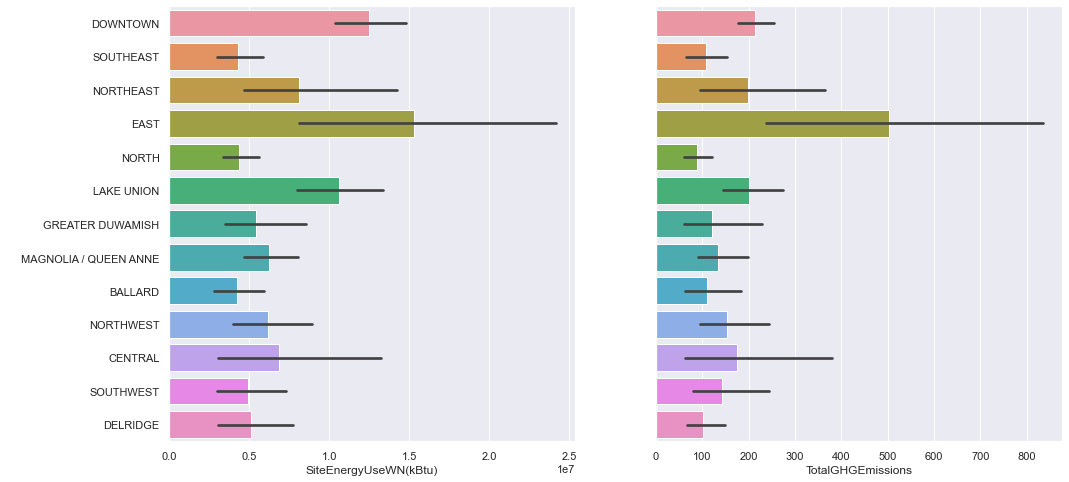

In [71]:
fig, axs = plt.subplots(1, 2, figsize=(16,8), sharey=True)
sns.barplot(y='Neighborhood', x=targets[0], data=df, ax=axs[0])
sns.barplot(y='Neighborhood', x=targets[1], data=df, ax=axs[1])
axs[0].set_ylabel(' '), axs[1].set_ylabel(' ');

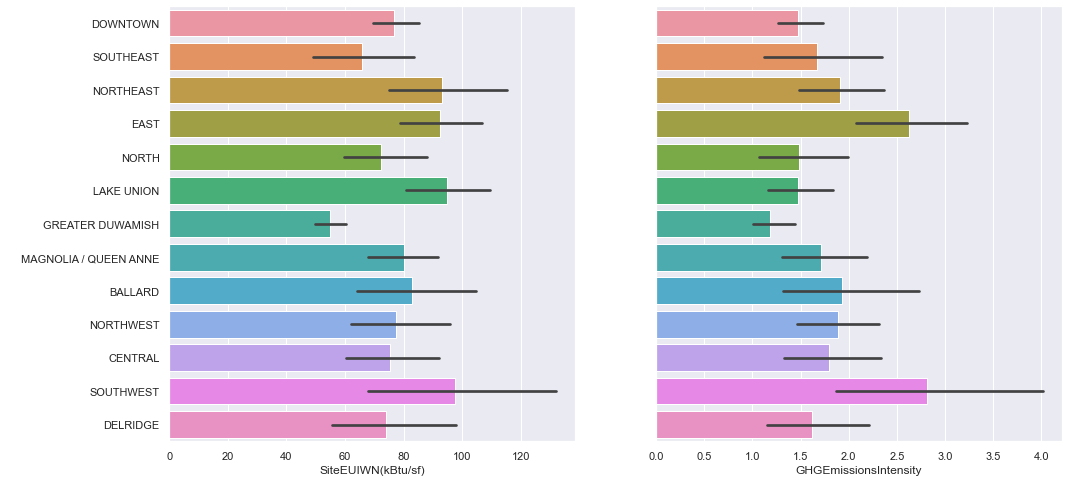

In [72]:
# Targets normalisées
fig, axs = plt.subplots(1, 2, figsize=(16,8), sharey=True)
sns.barplot(y='Neighborhood', x=targets_norm[0], data=df, ax=axs[0])
sns.barplot(y='Neighborhood', x=targets_norm[1], data=df, ax=axs[1])
axs[0].set_ylabel(' '), axs[1].set_ylabel(' ');

On peut voir que certains quartiers émettent peu par rapport à leur consommation, c'est le cas des quartiers DOWNTOWN et LAKE UNION.

### Largest Property Use Type

In [73]:
# Classement des types de bâtiments qui consomment le plus au mètre carré
df.groupby('LargestPropertyUseType')[targets_norm[0]].median().sort_values(ascending=False)

LargestPropertyUseType
Data Center                                             694.700012
Supermarket/Grocery Store                               254.400002
Urgent Care/Clinic/Outpatient                           240.350002
Laboratory                                              235.899994
Hospital (General Medical & Surgical)                   203.900002
Museum                                                  184.699997
Restaurant                                              165.699997
Specialty Hospital                                      162.750000
Mall                                                    148.499996
Restaurant/Bar                                          147.650002
Police Station                                          141.600006
Lifestyle Center                                        121.250000
Senior Care Community                                   103.849998
Recreation                                              103.199997
Personal Services (Health/Beauty, Dry C

In [74]:
# Classement des types de bâtiments qui émettent le plus au mètre carré
df.groupby('LargestPropertyUseType')[targets_norm[1]].median().sort_values(ascending=False)

LargestPropertyUseType
Hospital (General Medical & Surgical)                   7.435
Restaurant                                              6.000
Urgent Care/Clinic/Outpatient                           5.395
Restaurant/Bar                                          5.330
Supermarket/Grocery Store                               4.990
Laboratory                                              4.890
Museum                                                  4.510
Data Center                                             4.480
Fitness Center/Health Club/Gym                          3.750
Education                                               3.610
Mall                                                    3.405
Senior Care Community                                   3.235
Specialty Hospital                                      3.170
Police Station                                          3.100
Lifestyle Center                                        2.985
Recreation                                     

# Relation entre variables

## Matrice des corrélations

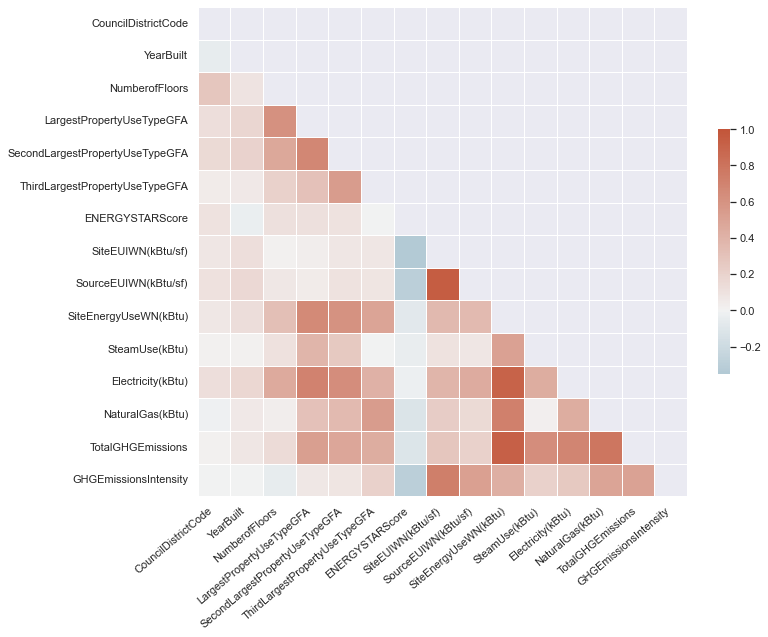

In [75]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.xticks(rotation=40, horizontalalignment='right');

In [76]:
def print_correlations(df, min_corr, max_corr=1, print_correlations=True, return_variables=False):
    """
    Print the correlations between different variables if the value is between min_corr and max_corr.
    
    
    Parameters
    ----------
    df : class:`pandas.DataFrame`
        The DataFrame from which we compute the correlation matrix.
    
    min_corr : float
        Minimum correlation value to print.
    
    max_corr : float, default: 1
        Maximum correlation value to print.
    """
    
    # We fill the upper right diagonal with NaNs so we don't print the correlation of the variable
    # with itself and we dont print 2 times the same pair of variables
    corr = df.corr()
    # Generate a mask for the upper triangle
    mask = pd.DataFrame(np.triu(np.ones_like(corr, dtype=bool)), columns=corr.columns, index=corr.index)
    corr = corr[~mask]

    mask = (corr > min_corr) & (corr <= max_corr)

    correlated_variables = []
    for col in corr.columns:
        values = corr[mask][col].dropna().values.round(3) # we round to the thousandth
        if values.size > 0:
            correlated_variables.append(col)
            indexes = corr[mask][col].dropna().index
            correlated_variables += list(indexes)
            if print_correlations == True:
                for i in range(indexes.size):
                    print(f'{col} / {indexes[i]}' + '-'*(60-(len(col)+len(indexes[i]))) + f'({values[i]})')
    
    if return_variables == True:
        correlated_variables = list(set(correlated_variables))
        return correlated_variables

In [77]:
# Variables corrélées à plus de 90%
print_correlations(df, .9)

SiteEUIWN(kBtu/sf) / SourceEUIWN(kBtu/sf)----------------------(0.945)
SiteEnergyUseWN(kBtu) / Electricity(kBtu)----------------------(0.908)
SiteEnergyUseWN(kBtu) / TotalGHGEmissions----------------------(0.921)


Retraçons la matrice des corrélations mais seulement avec les variables qui sont corrélées à plus de 70% avec au moins une autre variable

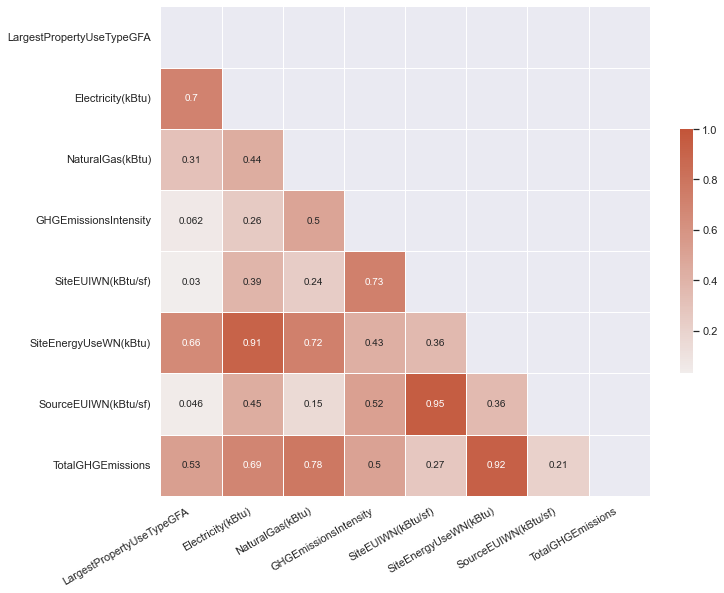

In [78]:
# Compute the correlation matrix
correlated_variables = print_correlations(df, .7, print_correlations=False, return_variables=True)
corr = df[correlated_variables].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.xticks(rotation=30, horizontalalignment='right');

On voit que les variables `SiteEUIWN(kBtu/sf)` et `SourceEUIWN(kBtu/sf)` sont corrélées à 94%, on peut donc en éliminer une des deux. Quant aux variables énergétiques, on ne doit pas les utiliser directement pour la modélisation car l'objectif est de se passer des relevés d'énergie pour nos prédictions, mais on va les garder car elles pourront nous servir pour du faire du feature engineering.

In [79]:
df = df.drop(columns='SourceEUIWN(kBtu/sf)')
df.shape

(1578, 18)

## ANOVA

In [80]:
from scipy import stats

In [81]:
def anova(X_name, Y_name, data, print_values=False):

    k = len(data[X_name].unique())  # number of groups
    N = len(data.values)  # total number of values
    n = data.groupby(X_name).size() # number of values in each group

    # Degrees of freedom
    databetween = k - 1
    datawithin = N - k
    datatotal = N - 1

    y = data[Y_name]
    y_mean = y.mean()
    yi_means = data.groupby(X_name).mean()[Y_name]
    
    # Sum of Squares Between
    SSbetween = (n*(yi_means - y_mean)**2).sum()

    # Sum of Squares Within
    groups = data[X_name].unique()
    group_var = []
    for group in groups:
        y_group = data.loc[data[X_name] == group, [Y_name]]
        group_var.append(((y_group.values - yi_means[group])**2).sum())
    SSwithin = np.array(group_var).sum()

    # Sum of Squares Total
    SStotal = ((y - y_mean)**2).sum()

    # Mean Square Between
    MSbetween = SSbetween/databetween

    # Mean Square Within
    MSwithin = SSwithin/datawithin

    # Calculating the F-value
    F = MSbetween/MSwithin

    # p-value
    p = stats.f.sf(F, databetween, datawithin)

    # eta squared
    eta_sqrd = SSbetween/SStotal

    # omega squared
    om_sqrd = (SSbetween - (databetween * MSwithin))/(SStotal + MSwithin)
    
    if print_values == True:
        print('eta squared :', eta_sqrd.round(3))
        #print('omega squared :', om_sqrd.round(3))
        #print('F-value :', F)
        print('p-value :', p)
        
    
    return eta_sqrd, p

In [82]:
eta_sqrd_matrix = {}
p_value_matrix = {}
for X_name in list(df.select_dtypes('object')):
    eta_sqrd_X = {}
    p_value_X = {}
    for Y_name in list(df.select_dtypes(np.number)):
        mask = df[X_name].notna() & df[Y_name].notna()
        eta_sqrd, p_value = anova(X_name, Y_name, df[mask])
        eta_sqrd_X[Y_name] = eta_sqrd
        p_value_X[Y_name] = p_value
    eta_sqrd_matrix[X_name] = eta_sqrd_X
    p_value_matrix[X_name] = p_value_X

eta_sqrd_matrix = pd.DataFrame(eta_sqrd_matrix)
p_value_matrix = pd.DataFrame(p_value_matrix)

On regarde s'il y a des valeurs de p-value supérieures à 5%

In [83]:
p_value_matrix[p_value_matrix>.05]

,Neighborhood,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType
CouncilDistrictCode,NaN,NaN,NaN,NaN
YearBuilt,NaN,NaN,NaN,NaN
NumberofFloors,NaN,NaN,NaN,NaN
LargestPropertyUseTypeGFA,NaN,NaN,NaN,NaN
SecondLargestPropertyUseTypeGFA,NaN,NaN,NaN,NaN
ThirdLargestPropertyUseTypeGFA,NaN,0.148802,NaN,NaN
ENERGYSTARScore,NaN,NaN,0.080168,0.351223
SiteEUIWN(kBtu/sf),NaN,NaN,NaN,NaN
SiteEnergyUseWN(kBtu),NaN,NaN,NaN,NaN
SteamUse(kBtu),NaN,NaN,0.962709,1.000000


On trace la matrice des $\eta^2$ en enlevant les valeurs pour lesquelles la p-value est supérieure à 5%

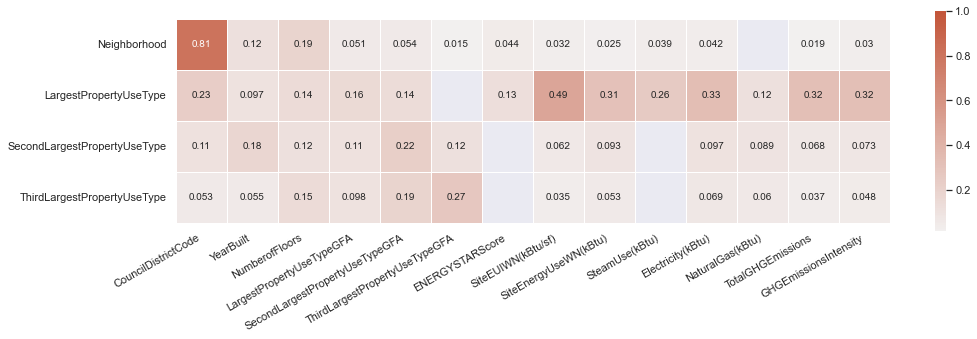

In [84]:
fig, ax = plt.subplots(figsize=(16, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(eta_sqrd_matrix[p_value_matrix < 0.05].T, cmap=cmap, 
            vmax=1, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .45});
plt.xticks(rotation=30, horizontalalignment='right');

Les variables `Neighborhood` et `CouncilDistrictCode` sont corrélées à 80%. On va garder la variable qui a le plus de valeurs diférentes.

In [85]:
df['Neighborhood'].unique().size

13

In [86]:
df['Neighborhood'].value_counts()

GREATER DUWAMISH         342
DOWNTOWN                 336
MAGNOLIA / QUEEN ANNE    143
LAKE UNION               141
EAST                     114
NORTHEAST                106
NORTHWEST                 84
BALLARD                   66
NORTH                     65
CENTRAL                   50
DELRIDGE                  46
SOUTHEAST                 45
SOUTHWEST                 40
Name: Neighborhood, dtype: int64

In [87]:
df['CouncilDistrictCode'].unique().size

7

In [88]:
df['CouncilDistrictCode'].value_counts()

7    498
2    389
3    190
4    148
5    129
1    117
6    107
Name: CouncilDistrictCode, dtype: int64

In [89]:
df = df.drop(columns='CouncilDistrictCode')
df.shape

(1578, 17)

In [91]:
df.to_csv('df_clean.csv')